<a href="https://colab.research.google.com/github/astitwa-agarwal12/Covid/blob/main/Covid_19_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import warnings 
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
import tensorflow as tf
warnings.filterwarnings('ignore')
dataset = 'drive/My Drive/dataset1'
imagePaths = list(paths.list_images(dataset))
data = []
labels = []
print(imagePaths)

['drive/My Drive/dataset1/Covid/bmj.m606.full-p4-22%3.png', 'drive/My Drive/dataset1/Covid/bmj.m606.full-p4-22%2.png', 'drive/My Drive/dataset1/Covid/PIIS0140673620303603%5.png', 'drive/My Drive/dataset1/Covid/2020.02.25.20021568-p23-108%15.png', 'drive/My Drive/dataset1/Covid/2020.03.10.20032136-p34-118_1%1.png', 'drive/My Drive/dataset1/Covid/2020.03.01.20029769-p21-73_2%2.png', 'drive/My Drive/dataset1/Covid/kjr-21-e24-p2-8.png', 'drive/My Drive/dataset1/Covid/2020.03.18.20038125-p15-54-5.png', 'drive/My Drive/dataset1/Covid/2020.03.22.20040782-p24-1533-5.png', 'drive/My Drive/dataset1/Covid/2020.03.18.20038125-p16-56-2.png', 'drive/My Drive/dataset1/Covid/2020.03.16.20036145-p19-128-2.png', 'drive/My Drive/dataset1/Covid/2020.03.19.20038539-p10-58.png', 'drive/My Drive/dataset1/Covid/2020.03.04.20031039-p23-97_1%2.png', 'drive/My Drive/dataset1/Covid/ehaa254-p0-63%2.png', 'drive/My Drive/dataset1/Covid/Comparison-of-different-samples-for-2019-novel-cor_2020_International-Journa-p2-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
for imagePath in imagePaths:
	
	label = imagePath.split(os.path.sep)[-2]
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))

	data.append(image)
	labels.append(label)

data = np.array(data) / 255.0
labels = np.array(labels)

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

In [ ]:
trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

In [ ]:
from tensorflow.keras.applications import NASNetMobile
inputs = Input((224, 224, 3))

In [ ]:
base_model = NASNetMobile(input_shape=(224,224,3),include_top=False,weights="imagenet")

20004864/19993432 [==============================] - 1s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from tensorflow.keras.optimizers import Adam
for layer in base_model.layers[:-4]:
    layer.trainable=False
model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(2,activation='softmax'))


In [ ]:
model.compile(loss="binary_crossentropy", optimizer='Nadam',
	metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 dropout (Dropout)           (None, 7, 7, 1056)        0         
                                                                 
 flatten (Flatten)           (None, 51744)             0         
                                                                 
 batch_normalization (BatchN  (None, 51744)            206976    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 32)                1655840   
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                        

In [ ]:
BS = 16
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=50)

Epoch 1/50
37/37 [==============================] - 37s 319ms/step - loss: 0.7097 - accuracy: 0.5690 - val_loss: 0.7163 - val_accuracy: 0.6333
Epoch 2/50
37/37 [==============================] - 7s 199ms/step - loss: 0.6699 - accuracy: 0.6121 - val_loss: 0.6005 - val_accuracy: 0.7200
Epoch 3/50
37/37 [==============================] - 9s 229ms/step - loss: 0.6432 - accuracy: 0.6586 - val_loss: 0.5697 - val_accuracy: 0.7067
Epoch 4/50
37/37 [==============================] - 7s 199ms/step - loss: 0.6140 - accuracy: 0.6966 - val_loss: 0.5407 - val_accuracy: 0.7133
Epoch 5/50
37/37 [==============================] - 7s 200ms/step - loss: 0.5798 - accuracy: 0.7276 - val_loss: 0.5050 - val_accuracy: 0.7467
Epoch 6/50
37/37 [==============================] - 8s 203ms/step - loss: 0.5389 - accuracy: 0.7638 - val_loss: 0.4768 - val_accuracy: 0.7800
Epoch 7/50
37/37 [==============================] - 7s 201ms/step - loss: 0.4966 - accuracy: 0.7821 - val_loss: 0.4676 - val_accuracy: 0.7600
Epoch

In [ ]:
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

              precision    recall  f1-score   support

       Covid       0.81      0.83      0.82        70
   Non_Covid       0.85      0.82      0.84        80

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [ ]:
from sklearn.metrics import f1_score
f1_score(testY.argmax(axis=1), predIdxs, average='micro')

0.8266666666666667

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(testY.argmax(axis=1), predIdxs)

0.8267857142857142

In [ ]:
from sklearn.metrics import confusion_matrix
a = confusion_matrix(testY.argmax(axis=1), predIdxs)
print('Sensitivity=',a[0,0]/(a[0,0]+a[0,1]))
print('Specificity=',a[1,1]/(a[1,0]+a[1,1]))

Sensitivity= 0.8285714285714286
Specificity= 0.825


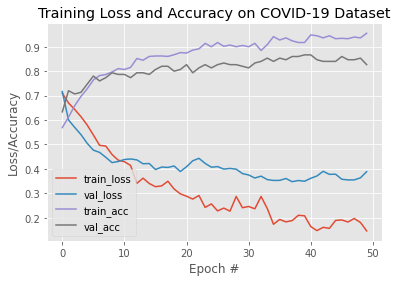

In [ ]:
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


In [ ]:
from tensorflow.keras.applications import VGG19
baseModel = VGG19(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [ ]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
for layer in baseModel.layers:
	layer.trainable = False


In [ ]:

model.compile(loss="binary_crossentropy", optimizer='Nadam',
	metrics=["accuracy"])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
BS = 16
H3 = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
		epochs=50)

Epoch 1/50
37/37 [==============================] - 15s 329ms/step - loss: 0.7097 - accuracy: 0.5259 - val_loss: 0.6720 - val_accuracy: 0.6600
Epoch 2/50
37/37 [==============================] - 9s 233ms/step - loss: 0.6830 - accuracy: 0.5655 - val_loss: 0.6521 - val_accuracy: 0.7467
Epoch 3/50
37/37 [==============================] - 8s 208ms/step - loss: 0.6732 - accuracy: 0.5828 - val_loss: 0.6382 - val_accuracy: 0.6400
Epoch 4/50
37/37 [==============================] - 8s 219ms/step - loss: 0.6430 - accuracy: 0.6569 - val_loss: 0.6153 - val_accuracy: 0.7267
Epoch 5/50
37/37 [==============================] - 14s 375ms/step - loss: 0.6356 - accuracy: 0.6517 - val_loss: 0.5950 - val_accuracy: 0.7667
Epoch 6/50
37/37 [==============================] - 12s 319ms/step - loss: 0.6161 - accuracy: 0.6914 - val_loss: 0.5820 - val_accuracy: 0.7533
Epoch 7/50
37/37 [==============================] - 12s 335ms/step - loss: 0.6018 - accuracy: 0.6931 - val_loss: 0.5755 - val_accuracy: 0.7067
Ep

In [ ]:
predIdxs = model.predict(testX, batch_size=BS)

In [ ]:
predIdxs = np.argmax(predIdxs, axis=1)

In [ ]:
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

              precision    recall  f1-score   support

       Covid       0.81      0.84      0.83        70
   Non_Covid       0.86      0.82      0.84        80

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [ ]:
from sklearn.metrics import f1_score
f1_score(testY.argmax(axis=1), predIdxs, average='micro')

0.8333333333333334

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(testY.argmax(axis=1), predIdxs)

0.8339285714285715

In [ ]:
from sklearn.metrics import confusion_matrix
a = confusion_matrix(testY.argmax(axis=1), predIdxs)
print('Sensitivity=',a[0,0]/(a[0,0]+a[0,1]))
print('Specificity=',a[1,1]/(a[1,0]+a[1,1]))


Sensitivity= 0.8428571428571429
Specificity= 0.825


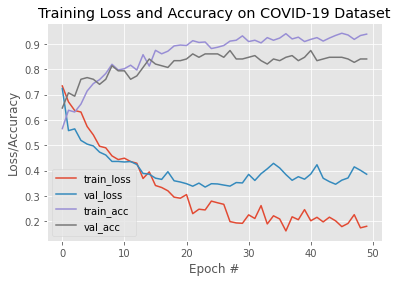

In [ ]:
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


In [ ]:
from tensorflow.keras.applications import ResNet50V2
resnet50_model = ResNet50V2(include_top = False, weights='imagenet', input_tensor = Input(shape=(224,224,3)))


94683136/94668760 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation
resnet50_head = resnet50_model.output
X = Flatten()(resnet50_head)
X = Dense(64)(X)
X = BatchNormalization()(X)
X = Activation('tanh')(X)
X = Dropout(0.25)(X)
X = Dense(64)(X)
X = BatchNormalization()(X)
X = Activation('tanh')(X)
X = Dropout(0.25)(X)
X = Dense(32)(X)
X = BatchNormalization()(X)
X = Activation('tanh')(X)
X = Dropout(0.25)(X)
X = Dense(32)(X)
X = BatchNormalization()(X)
X = Activation('tanh')(X)
resnet50_head = Dropout(0.5)(X)
resnet50_head = Dense(2, activation="softmax")(X)

In [ ]:
model = Model(inputs=resnet50_model.input, outputs=resnet50_head)
for layer in resnet50_model.layers:
	layer.trainable = False


In [ ]:
model.compile(loss="binary_crossentropy", optimizer='Nadam',
	metrics=["accuracy"])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
BS = 16
H4 = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=50)

Epoch 1/50
37/37 [==============================] - 16s 255ms/step - loss: 0.6086 - accuracy: 0.6966 - val_loss: 0.5344 - val_accuracy: 0.7600
Epoch 2/50
37/37 [==============================] - 7s 184ms/step - loss: 0.4266 - accuracy: 0.8276 - val_loss: 0.5278 - val_accuracy: 0.7333
Epoch 3/50
37/37 [==============================] - 7s 183ms/step - loss: 0.2946 - accuracy: 0.8862 - val_loss: 0.4100 - val_accuracy: 0.8467
Epoch 4/50
37/37 [==============================] - 7s 177ms/step - loss: 0.2264 - accuracy: 0.9241 - val_loss: 0.4168 - val_accuracy: 0.8533
Epoch 5/50
37/37 [==============================] - 7s 182ms/step - loss: 0.2566 - accuracy: 0.8845 - val_loss: 0.4836 - val_accuracy: 0.8333
Epoch 6/50
37/37 [==============================] - 7s 181ms/step - loss: 0.2178 - accuracy: 0.9155 - val_loss: 0.4682 - val_accuracy: 0.8333
Epoch 7/50
37/37 [==============================] - 7s 179ms/step - loss: 0.1703 - accuracy: 0.9379 - val_loss: 0.4852 - val_accuracy: 0.8133
Epoch

In [ ]:
predIdxs = model.predict(testX, batch_size=BS)

In [ ]:
predIdxs = np.argmax(predIdxs, axis=1)

In [ ]:
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

              precision    recall  f1-score   support

       Covid       0.84      0.89      0.86        70
   Non_Covid       0.89      0.85      0.87        80

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



In [ ]:
from sklearn.metrics import f1_score
f1_score(testY.argmax(axis=1), predIdxs, average='micro')

0.8666666666666667

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(testY.argmax(axis=1), predIdxs)

0.8678571428571429

In [ ]:
from sklearn.metrics import confusion_matrix
a = confusion_matrix(testY.argmax(axis=1), predIdxs)
print('Sensitivity=',a[0,0]/(a[0,0]+a[0,1]))
print('Specificity=',a[1,1]/(a[1,0]+a[1,1]))


Sensitivity= 0.8857142857142857
Specificity= 0.85


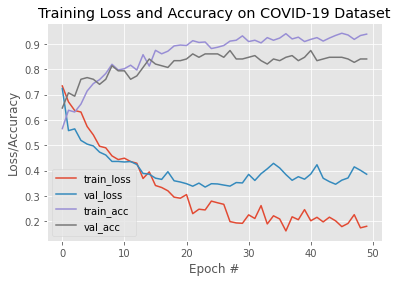

In [ ]:
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


In [ ]:
from tensorflow.keras.applications import MobileNet
base_model=MobileNet(weights='imagenet',include_top=False, input_tensor = Input(shape=(224,224,3)))

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x) 
preds=Dense(2,activation='softmax')(x)

In [ ]:
model=Model(inputs=base_model.input,outputs=preds)

In [ ]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_5
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

In [ ]:
for layer in model.layers:
    layer.trainable=False

In [ ]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [ ]:
model.compile(optimizer='Nadam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [ ]:
BS = 16
H5 = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=50)

Epoch 1/50
37/37 [==============================] - 16s 208ms/step - loss: 0.6793 - accuracy: 0.6724 - val_loss: 0.6746 - val_accuracy: 0.6200
Epoch 2/50
37/37 [==============================] - 6s 173ms/step - loss: 0.4084 - accuracy: 0.8345 - val_loss: 3.6603 - val_accuracy: 0.5733
Epoch 3/50
37/37 [==============================] - 6s 172ms/step - loss: 0.2978 - accuracy: 0.8897 - val_loss: 0.5350 - val_accuracy: 0.8600
Epoch 4/50
37/37 [==============================] - 8s 206ms/step - loss: 0.2464 - accuracy: 0.9034 - val_loss: 2.0813 - val_accuracy: 0.6800
Epoch 5/50
37/37 [==============================] - 7s 175ms/step - loss: 0.2846 - accuracy: 0.9052 - val_loss: 0.4291 - val_accuracy: 0.8533
Epoch 6/50
37/37 [==============================] - 6s 172ms/step - loss: 0.2653 - accuracy: 0.9017 - val_loss: 3.0386 - val_accuracy: 0.7333
Epoch 7/50
37/37 [==============================] - 6s 172ms/step - loss: 0.2684 - accuracy: 0.9155 - val_loss: 0.5220 - val_accuracy: 0.8867
Epoch

In [ ]:
predIdxs = model.predict(testX, batch_size=BS)

In [ ]:
predIdxs = np.argmax(predIdxs, axis=1)

In [ ]:
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

              precision    recall  f1-score   support

       Covid       0.87      0.87      0.87        70
   Non_Covid       0.89      0.89      0.89        80

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150



In [ ]:
from sklearn.metrics import f1_score
f1_score(testY.argmax(axis=1), predIdxs, average='micro')

0.88

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(testY.argmax(axis=1), predIdxs)

0.8794642857142857

In [ ]:
from sklearn.metrics import confusion_matrix
a = confusion_matrix(testY.argmax(axis=1), predIdxs)
print('Sensitivity=',a[0,0]/(a[0,0]+a[0,1]))
print('Specificity=',a[1,1]/(a[1,0]+a[1,1]))


Sensitivity= 0.8714285714285714
Specificity= 0.8875


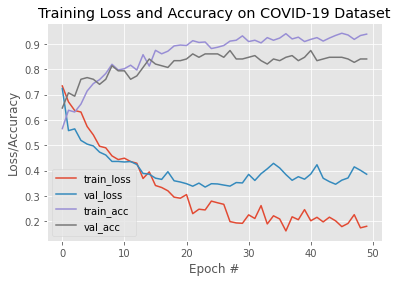

In [ ]:
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
